In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import io
import seaborn as sns #plot graph in graphical manner
import matplotlib.pyplot as plt #to plot graph
import warnings
import joblib
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
#pip install --upgrade numexpr

In [2]:
#Loading the data to pandas Dataframe(Structure of Dataset)
hazard_data=pd.read_csv('hazard.csv')


In [3]:
hazard_data.head()

,url,type
0,br-icloud.com.br,phishing
1,http://www.garage-pirenne.be/index.php?option=...,defacement
2,http://adventure-nicaragua.net/index.php?optio...,defacement
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign


In [4]:
hazard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20222 entries, 0 to 20221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     20222 non-null  object
 1   type    20222 non-null  object
dtypes: object(2)
memory usage: 316.1+ KB


In [5]:
hazard_data.shape

(20222, 2)

In [6]:
hazard_data.isnull().sum()

url     0
type    0
dtype: int64

In [7]:
hazard_data = hazard_data.dropna()

In [8]:
hazard_data.isnull().sum()

url     0
type    0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

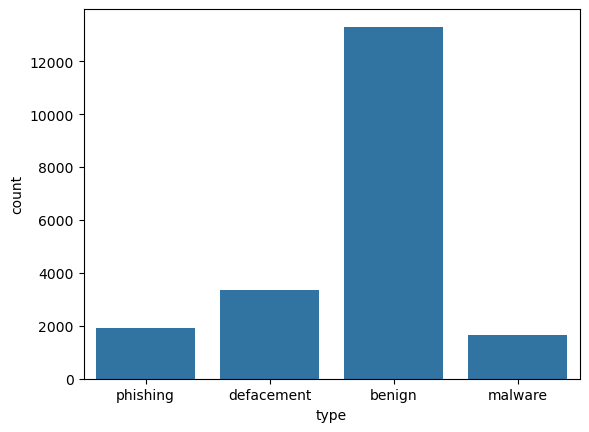

In [9]:
#Data Visualization
sns.countplot(x = 'type',data = hazard_data)

In [10]:
hazard_data['type'].value_counts()

type
benign        13307
defacement     3361
phishing       1905
malware        1649
Name: count, dtype: int64

In [11]:
hazard_data['type'] = hazard_data['type'].map({'phishing': 0, 'benign': 1,'defacement': 2,'malware' : 3}).astype(int)
print(hazard_data.head)

<bound method NDFrame.head of                                                      url  type
0                                       br-icloud.com.br     0
1      http://www.garage-pirenne.be/index.php?option=...     2
2      http://adventure-nicaragua.net/index.php?optio...     2
3      http://buzzfil.net/m/show-art/ils-etaient-loin...     1
4          espn.go.com/nba/player/_/id/3457/brandon-rush     1
...                                                  ...   ...
20217                  http://112.17.123.56:43506/Mozi.m     3
20218                  http://124.67.89.238:48336/Mozi.m     3
20219                 http://221.210.211.13:59932/Mozi.m     3
20220                   http://172.45.28.36:55258/Mozi.m     3
20221                 http://219.157.146.65:51504/Mozi.m     3

[20222 rows x 2 columns]>


In [12]:
hazard_data = hazard_data.dropna(subset=['url', 'type'])  # Drop rows with NaN in text or label
X = hazard_data['url']  # Feature column
Y = hazard_data['type']  # Target column
print(X)
print(Y)

0                                         br-icloud.com.br
1        http://www.garage-pirenne.be/index.php?option=...
2        http://adventure-nicaragua.net/index.php?optio...
3        http://buzzfil.net/m/show-art/ils-etaient-loin...
4            espn.go.com/nba/player/_/id/3457/brandon-rush
                               ...                        
20217                    http://112.17.123.56:43506/Mozi.m
20218                    http://124.67.89.238:48336/Mozi.m
20219                   http://221.210.211.13:59932/Mozi.m
20220                     http://172.45.28.36:55258/Mozi.m
20221                   http://219.157.146.65:51504/Mozi.m
Name: url, Length: 20222, dtype: object
0        0
1        2
2        2
3        1
4        1
        ..
20217    3
20218    3
20219    3
20220    3
20221    3
Name: type, Length: 20222, dtype: int32


In [13]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train = Y_train.to_numpy()

In [14]:
print(X.shape, X_train.shape,X_test.shape)

print(len(X_train), len(Y_train))  # These should be the same




(20222,) (16177,) (4045,)
16177 16177


In [15]:
# Step 2: Convert Text to Numerical Data
# Use TfidfVectorizer to transform text data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)



In [16]:
print(X_train_vectorized.shape)  # Should return something like (number_of_samples, number_of_features)
print(Y_train.shape)  

(16177, 5000)
(16177,)


In [17]:
print("X_train size:", X_train.shape)
print("Y_train size:", Y_train.shape)

X_train size: (16177,)
Y_train size: (16177,)


In [18]:
# Train Random Forest Classifier
try:
    model = RandomForestClassifier()
    model.fit(X_train_vectorized, Y_train)
    print("Model fitted successfully")
except Exception as e:
    print(f"Error occurred during model fitting: {e}")
    

Model fitted successfully


In [19]:
print(X_train_vectorized.shape)  # Should return something like (number_of_samples, number_of_features)
print(Y_train.shape) 

(16177, 5000)
(16177,)


In [20]:
Y_pred_rf = model.predict(X_test_vectorized)

In [21]:
print("Length of predictions:", len(Y_pred_rf))
print("First few predictions:", Y_pred_rf[:10])

Length of predictions: 4045
First few predictions: [1 1 1 1 2 0 1 1 1 1]


In [22]:
acc = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy of the Random Forest model: {acc:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Accuracy of the Random Forest model: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       394
           1       0.95      0.99      0.97      2647
           2       0.94      0.98      0.96       670
           3       0.97      0.91      0.94       334

    accuracy                           0.95      4045
   macro avg       0.94      0.88      0.90      4045
weighted avg       0.94      0.95      0.94      4045



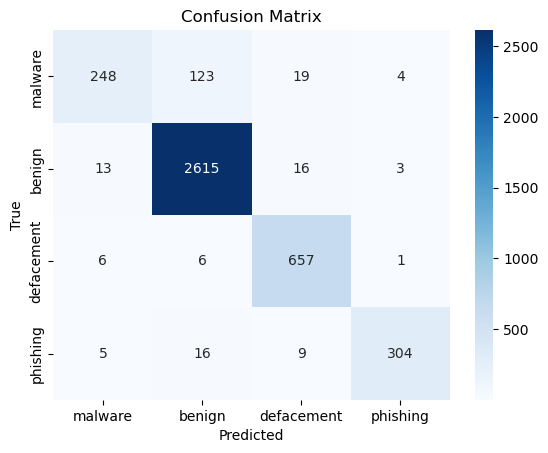

In [23]:
# Confusion matrix visualization
cm = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['malware', 'benign','defacement','phishing'], yticklabels=['malware', 'benign','defacement','phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
svm_model = SVC()

# Train the SVM model using the training data (X_train and Y_train)
svm_model.fit(X_train_vectorized, Y_train)

# Make predictions on the test set (X_test)
Y_pred_svm = svm_model.predict(X_test_vectorized)

# Calculate the accuracy score by comparing the predicted labels with the actual labels
accuracy = accuracy_score(Y_test, Y_pred_svm)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       394
           1       0.94      0.99      0.97      2647
           2       0.96      0.99      0.97       670
           3       0.99      0.91      0.95       334

    accuracy                           0.95      4045
   macro avg       0.96      0.88      0.91      4045
weighted avg       0.95      0.95      0.95      4045



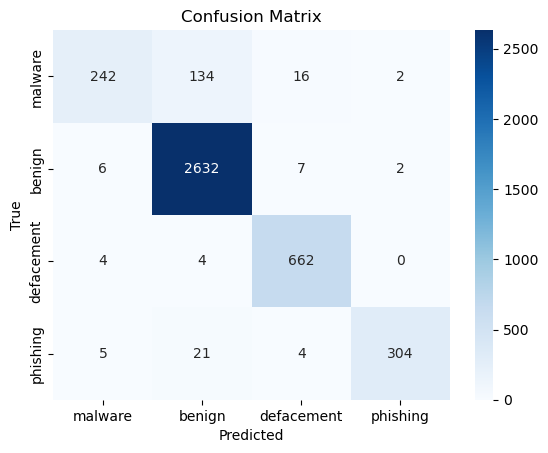

In [25]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_svm))

# Confusion matrix visualization
cm = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['malware', 'benign','defacement','phishing'], yticklabels=['malware', 'benign','defacement','phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)  # Adjust max_depth

# Train the model
tree_clf.fit(X_train_vectorized, Y_train)

# Make predictions on the test set
y_pred_DT = tree_clf.predict(X_test_vectorized)

# Evaluate the model
accuracy1 = accuracy_score(Y_test, y_pred_DT)
print(f"Accuracy: {accuracy1:.2f}")

Accuracy: 0.92


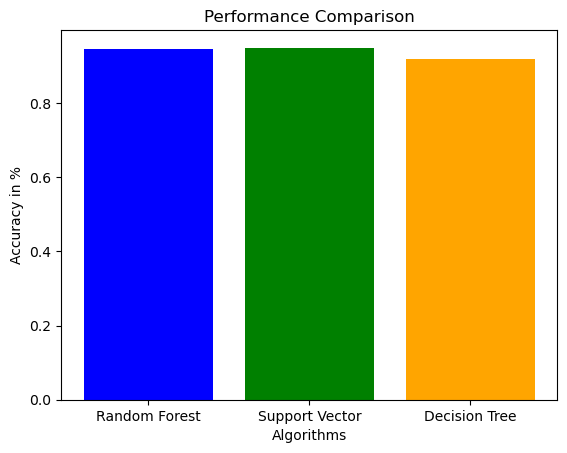

In [27]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1,2,3] 
  
# heights of bars 
height = [acc,accuracy,accuracy1] 
  
# labels for bars 
tick_label = ['Random Forest', 'Support Vector','Decision Tree'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['blue', 'green','Orange']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.show() 

# Model


In [28]:
# Save models and vectorizer

joblib.dump(svm_model, 'support_vector.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [ ]:
import joblib

# Load the saved model and vectorizer
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('support_vector.pkl')  # Use the desired model

def predict_hazard(input_text, model, vectorizer):
    # Transform the input text
    input_features = vectorizer.transform([input_text])
    prediction = model.predict(input_features)[0]
    
    # Correct label mapping
    label_map = {
        0: "phishing",
        1: "benign",
        2: "defacement",
        3: "malware"
    }
    
    # Return the mapped result
    return label_map.get(prediction, "Unknown Prediction")  # Default to "Unknown Prediction" for unmapped values

# Accept input and predict
user_text = input("Enter URL: ")
result = predict_hazard(user_text, model, vectorizer)
print(f"Prediction: {result}")
